In [16]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import Particles
"""
from nbody.particles import Particles
from nbody.simulator import NBodySimulator
"""

'\nfrom nbody.particles import Particles\nfrom nbody.simulator import NBodySimulator\n'

# The `Particles` class

We could write a `Particles` python class to handle the particle information.
The class contains several physical properties, including tag, mass, position, velocity, acceleration, and time.

For our own convenience, we want to have the below data type to handle the N-body simulation:

In [17]:
time          = 0    # the starting  time
num_particles = 100  # number of particles
masses        = np.ones((num_particles,1))
positions     = np.zeros((num_particles,3)) # 3 directions
velocities    = np.zeros((num_particles,3))
accelerations = np.zeros((num_particles,3))
tags          = np.linspace(1,num_particles,num_particles)

Note that, the mass is setting to a Nx1 martrix.\
The reason to use Nx1 matrix but not a 1D numpy array is because mass x velcoity is the momentum\
and only Nx1 matrix could multiple with an Nx3 matrix.

The particles class can be initialized by

In [18]:
particles = Particles(N=num_particles)
# send N=num_particles to __init__ to initialize attributes and create an Instance called particles

In [19]:
particles.masses = np.ones((num_particles,1))
particles.positions = np.random.rand(num_particles, 3)
particles.velocities = np.random.rand(num_particles, 3)
particles.accelerations = np.random.rand(num_particles, 3)
particles.tags = np.linspace(1,num_particles,num_particles)
# assign the value to particle's (instance) attributes

Make sure your code will check the shape of your inputs. It must return errors when setting an incorrect shape.

In [20]:
# make sure the below codes will return an error. uncomment each line to test

#particles.masses = np.ones(num_particles)
#particles.positions = np.random.rand(199, 3)
#particles.velocities = np.random.rand(500, 3)
#particles.accelerations = np.random.rand(num_particles, 2)
#particles.tags = np.linspace(1,num_particles,500)

# Add (remove) more particles

We could add more particles on the fly.

In [21]:
num_particles = 20
masses = np.ones((num_particles,1))
positions = np.random.rand(num_particles, 3)
velocities = np.random.rand(num_particles, 3)
accelerations = np.random.rand(num_particles, 3)

particles.add_particles(masses, positions, velocities, accelerations)
print(particles.nparticles)

120


### Data IO

We could also dump the particle information into a text file.

In [22]:
particles.output(filename='data.txt')

### Visualization

We could also visualize (both 2D and 3D) these particles

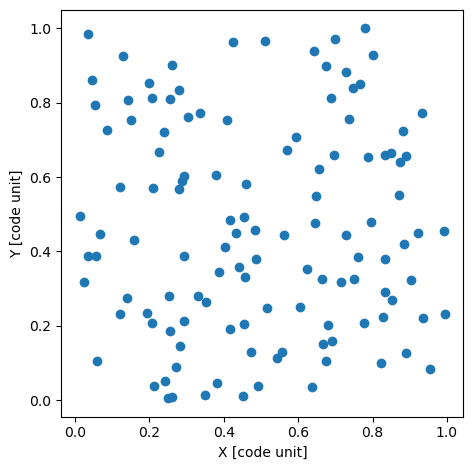

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='X [code unit]', ylabel='Y [code unit]'>)

In [23]:
particles.draw(dim=2)

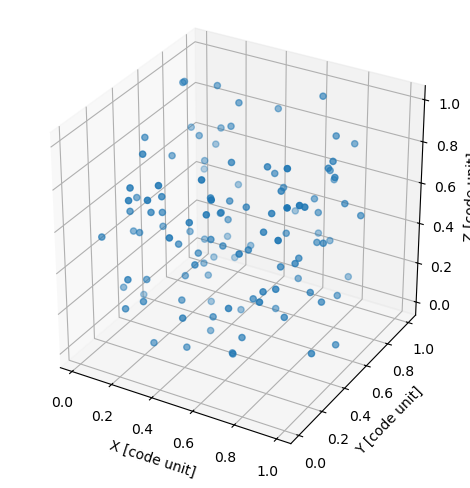

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X [code unit]', ylabel='Y [code unit]', zlabel='Z [code unit]'>)

In [24]:
particles.draw(dim=3)

# Exercise 1

Implment the `Particles` class in `./nbody/particles.py`. Please make sure your Particles class has passed all the test in the above section. 

In [25]:
# TODO: test your class here


# Exercise 2

Once you have the `Particles` class implmented correctly.\
You should be able to use it to initialzie arbitry distribution of N particles.

(1) Initialize two particles that describe the Sun-Earth binary system.

(2) Initialize a 3D particle clould with N=1000 particles in a normal distrbuiotn (sigma=1) and total mass equal to 10.

Hints: use `numpy.random.randn` (see https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html). 

In [26]:
# Part (1)
num_particles = 2    # only the Earth and the Sun
particles = Particles(N=num_particles) # create instance

# the Sun (assume not moving and at the origin)
G = 6.67430e-11 # [m^3 kg^-1 s^-2]
sun_mass = 1.989e30 # [kg]

particles.masses[0] = sun_mass # [kg]
particles.positions[0] = np.array([0,0,0]) # [m]
particles.velocities[0] = np.array([0,0,0]) # [m/s]

# the Earth
earth_sun_distance = 1.496e11 # [m]
earth_mass = 5.972e24 # [kg]
earth_velocity = 2*np.pi*earth_sun_distance/(365.25*24*3600) # [m/s]
earth_acc = G*sun_mass/earth_sun_distance**2 # [m/s^2]

particles.masses[1] = earth_mass
particles.positions[1] = np.array([earth_sun_distance,0,0]) # [m]  ,    pos-xdirection
particles.velocities[1] = np.array([0,earth_velocity,0])    # [m/s],    vel-ydirection
particles.accelerations[1] = np.array([-earth_acc, 0, 0])   # [m/s^2]   acc-xdirection

In [27]:
# Part (1) (alternative)

particles     = Particles()

# the Sun (assume not moving and at the origin)
G = 6.67430e-11 # [m^3 kg^-1 s^-2]
sun_mass = 1.989e30 # [kg]

sun_masses = np.ones((1,1))*sun_mass # [kg]
sun_positions = np.array([0,0,0]) # [m]
sun_velocities = np.array([0,0,0]) # [m/s]
sun_accelerations = np.array([0,0,0]) # [m/s^2]

particles.add_particles(sun_masses, sun_positions, sun_velocities, sun_accelerations)

# the Earth
earth_sun_distance = 1.496e11 # [m]
earth_mass = 5.972e24 # [kg]
earth_velocity = 2*np.pi*earth_sun_distance/(365.25*24*3600) # [m/s]
earth_acc = G*sun_mass/earth_sun_distance**2 # [m/s^2]

earth_masses = np.ones((1,1))*earth_mass
earth_positions = np.array([earth_sun_distance,0,0]) # [m]
earth_velocities = np.array([0,earth_velocity,0]) # [m/s]
earth_accelerations = np.array([-earth_acc, 0, 0]) # [m/s^2]

particles.add_particles(earth_masses, earth_positions, earth_velocities, earth_accelerations)


Text(0.5, 0, 'x [m]')

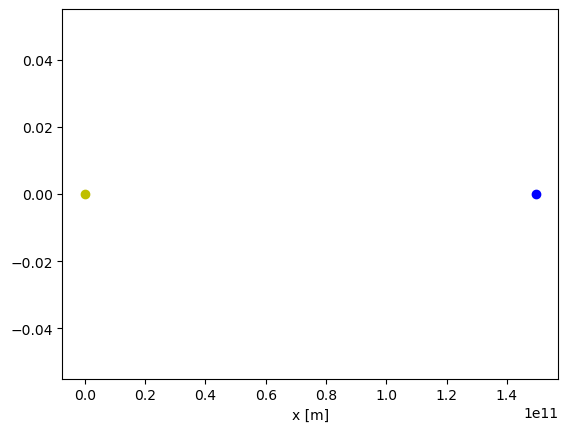

In [28]:
plt.figure()
plt.plot(particles.positions[0,0], particles.positions[0,1], 'yo', label='Sun')
plt.plot(particles.positions[1,0], particles.positions[1,1], 'bo', label='Earth')
"""
particles.positions[[Sun_posx, Sun_posy, Sun_posz]
                    [Ear_posx, Ear_posy, Ear_posz]]
"""
plt.xlabel('x [m]')

In [29]:
# Part (2)
time          = 0       # the starting  time
num_particles = 1000    # only the Earth and the Sun
pt_mass       = 10/num_particles
particles     = Particles(N=num_particles)  # create instance

particles.masses = np.ones((num_particles,1))*pt_mass
particles.positions = np.random.randn(num_particles, 3)
particles.velocities = np.random.randn(num_particles, 3)
particles.accelerations = np.random.randn(num_particles, 3)
particles.tags = np.linspace(1,num_particles,num_particles)

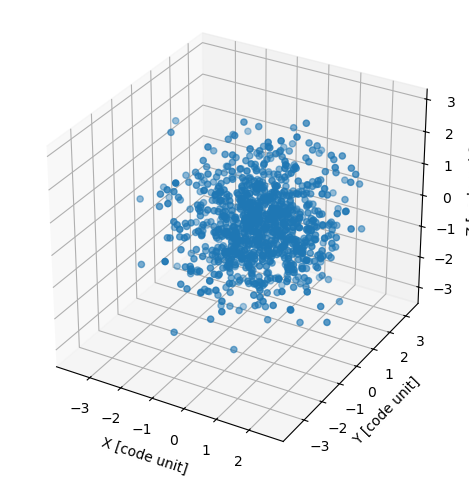

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X [code unit]', ylabel='Y [code unit]', zlabel='Z [code unit]'>)

In [30]:
particles.draw(dim=3)